<a href="https://colab.research.google.com/github/rit-clone/human_activity_recognition/blob/main/human_activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

In [5]:
train_df = pd.read_csv("drive/MyDrive/Colab Notebooks/Datasets/smartphone sensor data/train.csv")
test_df = pd.read_csv("drive/MyDrive/Colab Notebooks/Datasets/smartphone sensor data/test.csv")

In [6]:
print(train_df.shape)
print(test_df.shape)

(7352, 563)
(2947, 563)


In [7]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [9]:
(train_df.isnull().sum()!=0).sum()

0

In [10]:
(test_df.isnull().sum()!=0).sum()

0

In [11]:
train_df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [12]:
train_features = train_df.drop(["Activity", "subject"], axis=1)
test_features = test_df.drop(["Activity", "subject"], axis=1)

train_labels = train_df["Activity"].replace(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'],  [0, 1, 2, 3, 4, 5])
test_labels = test_df["Activity"].replace(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'],  [0, 1, 2, 3, 4, 5])

print(train_features.shape)
print(test_features.shape)

print(train_labels.shape)
print(test_labels.shape)

(7352, 561)
(2947, 561)
(7352,)
(2947,)


In [13]:
columns = train_df.columns

### Visualizations

In [14]:
mean_X = []
mean_Y = []
mean_Z = []
for i in columns:
    if "mean" in i:
        if "X" in i:
            mean_X.append(i)
        elif "Y" in i:
            mean_Y.append(i)
        elif "Z" in i:
            mean_Z.append(i)

In [15]:
min_X = []
min_Y = []
min_Z = []
for i in columns:
    if "min" in i:
        if "X" in i:
            min_X.append(i)
        elif "Y" in i:
            min_Y.append(i)
        elif "Z" in i:
            min_Z.append(i)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [17]:
px.histogram(train_df,x='Activity',color='Activity',title='Number of recordings per activity')

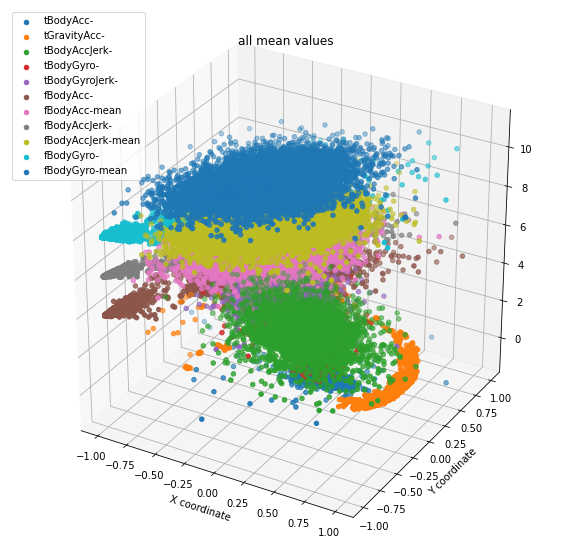

In [18]:
fig = plt.figure(figsize=(10, 10))
axs = plt.axes(projection="3d")

for i in range(len(mean_X)):
    axs.scatter(train_df[mean_X[i]].values, train_df[mean_Y[i]].values, train_df[mean_Z[i]].values+i, label=mean_X[i][0:-8])

plt.title("all mean values")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend(loc="upper left")
plt.show()

[Text(0, 0, 'LAYING'),
 Text(0, 0, 'SITTING'),
 Text(0, 0, 'STANDING'),
 Text(0, 0, 'WALKING'),
 Text(0, 0, 'WALKING_DOWNSTAIRS'),
 Text(0, 0, 'WALKING_UPSTAIRS')]

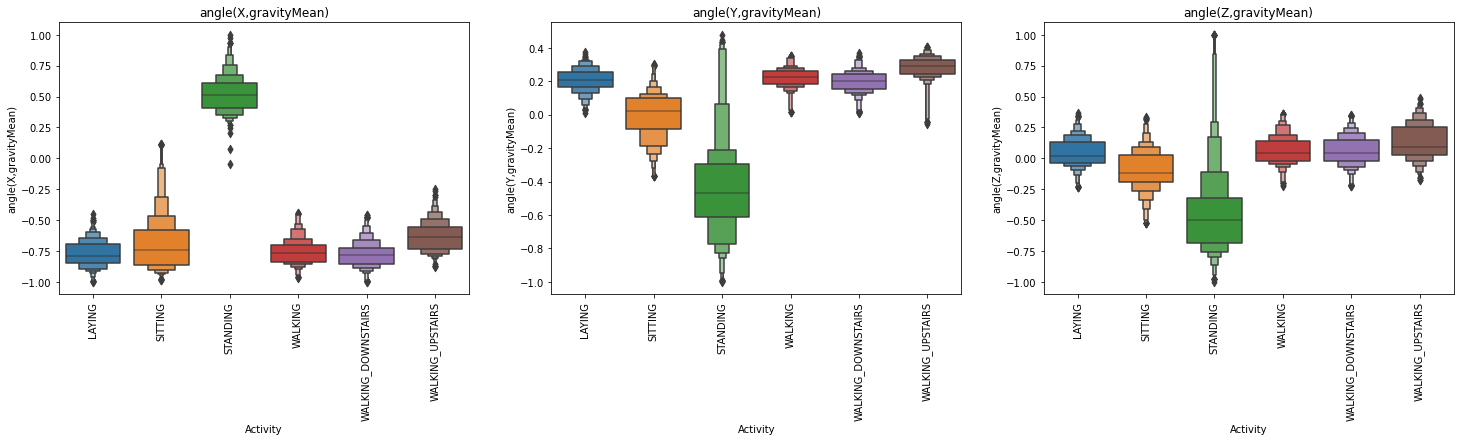

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
sns.boxenplot(ax = axs[0], x="Activity", y="angle(X,gravityMean)", data=train_df)
sns.boxenplot(ax = axs[1], x="Activity", y="angle(Y,gravityMean)", data=train_df)
sns.boxenplot(ax = axs[2], x="Activity", y="angle(Z,gravityMean)", data=train_df)

axs[0].set_title("angle(X,gravityMean)")
axs[0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], rotation="vertical")

axs[1].set_title("angle(Y,gravityMean)")
axs[1].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], rotation="vertical")

axs[2].set_title("angle(Z,gravityMean)")
axs[2].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], rotation="vertical")

###Activity Recognition

In [1]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
rfc = RandomForestClassifier()

In [24]:
svc = SVC()

In [25]:
knn.fit( train_features, train_labels )

KNeighborsClassifier(n_neighbors=3)

In [26]:
rfc.fit( train_features, train_labels )

RandomForestClassifier()

In [27]:
svc.fit( train_features, train_labels )

SVC()

In [28]:
knn_score = knn.score( test_features, test_labels )

In [29]:
rfc_score = rfc.score( test_features, test_labels )

In [30]:
svc_score = svc.score( test_features, test_labels )

In [31]:
print(f"KNN: {knn_score*100}%")
print(f"Random Forest: {rfc_score*100}%")
print(f"SVC: {svc_score*100}%")

KNN: 89.07363420427554%
Random Forest: 92.53478113335596%
SVC: 95.04580929759076%
